In [ ]:
#Deutsch-Jozsa algorithm

In [3]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity 
from qiskit.tools.visualization import plot_histogram

from qiskit import *
IBMQ.load_accounts(hub=None)
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.ibmq import least_busy

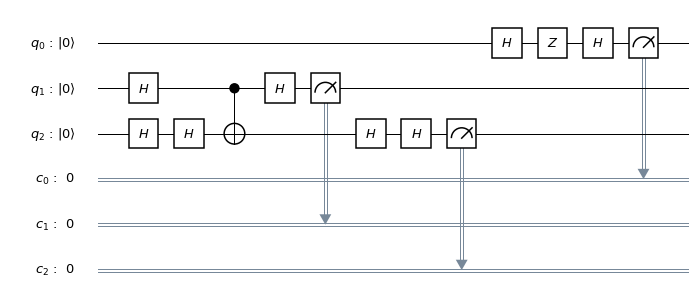

In [13]:
#balanced
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[2])
circ.cx(q[1],q[2])
circ.z(q[0])
circ.h(q[2])
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])

circ.measure(q[0],c[0])
circ.measure(q[1],c[1])
circ.measure(q[2],c[2])

circ.draw(output='mpl')

{'011': 255, '101': 256, '111': 236, '001': 277}


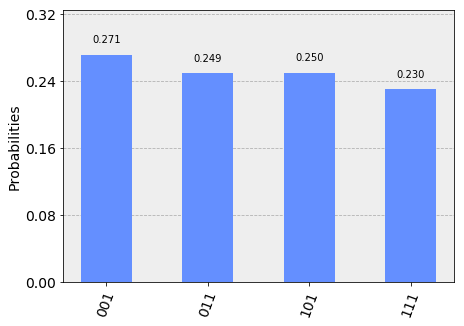

In [14]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)

In [15]:
backend = least_busy(IBMQ.backends(filters=lambda x: not x.configuration().simulator))
backend.name()

'ibmqx2'

In [16]:
job1 = execute(circ, backend)
job_monitor(job1)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'110': 16, '001': 271, '000': 9, '100': 10, '111': 247, '010': 12, '011': 218, '101': 241}


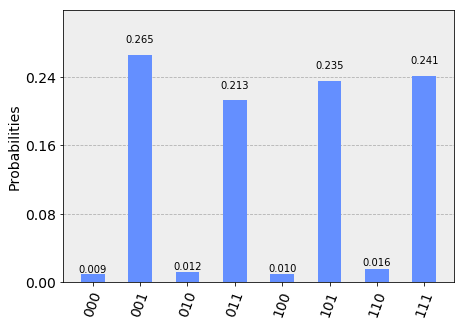

In [17]:
result1 = job1.result()
counts1 = result1.get_counts(circ)
print(counts1)

plot_histogram(counts1)

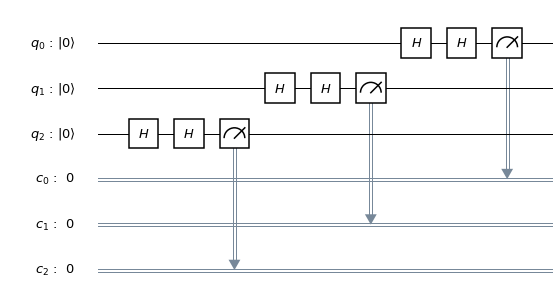

In [9]:
#constant
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])

circ.measure(q[0],c[0])
circ.measure(q[1],c[1])
circ.measure(q[2],c[2])

circ.draw(output='mpl')

{'000': 1024}


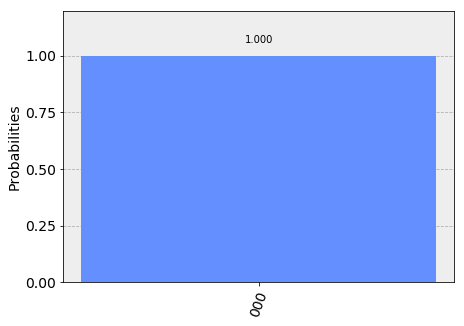

In [10]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)

In [8]:
backend = least_busy(IBMQ.backends(filters=lambda x: not x.configuration().simulator))
backend.name()

'ibmqx2'

In [11]:
job1 = execute(circ, backend)
job_monitor(job1)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'100': 1, '001': 24, '111': 1, '010': 308, '011': 5, '110': 2, '000': 683}


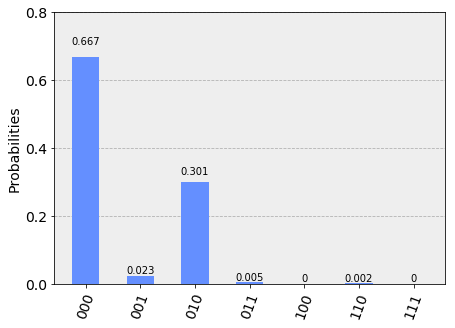

In [12]:
result1 = job1.result()
counts1 = result1.get_counts(circ)
print(counts1)

plot_histogram(counts1)